In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
train_path = 'dataset/'

In [3]:
train_data_gen = ImageDataGenerator(rescale=1/255)
train_set = train_data_gen.flow_from_directory(directory=train_path, target_size=(128,128), batch_size=32, color_mode='rgb', class_mode='binary')

Found 198 images belonging to 2 classes.


In [4]:
train_set.shape

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

In [5]:
cnn = keras.Sequential([
    keras.layers.Conv2D(kernel_size=(3,3), input_shape=(128,128,3), filters=40, activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(kernel_size=(3,3), filters=80, activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(70, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 40)      1120      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 40)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 80)        28880     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 80)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 72000)             0         
                                                                 
 dense (Dense)               (None, 70)                5

In [6]:
stats = cnn.fit(train_set, epochs=5)

Epoch 1/5
7/7 [==============================] - 7s 705ms/step - loss: 1.0422 - accuracy: 0.4848
Epoch 2/5
7/7 [==============================] - 3s 459ms/step - loss: 0.6557 - accuracy: 0.6061
Epoch 3/5
7/7 [==============================] - 3s 460ms/step - loss: 0.4596 - accuracy: 0.8182
Epoch 4/5
7/7 [==============================] - 3s 473ms/step - loss: 0.2538 - accuracy: 0.8889
Epoch 5/5
7/7 [==============================] - 3s 474ms/step - loss: 0.0909 - accuracy: 0.9798


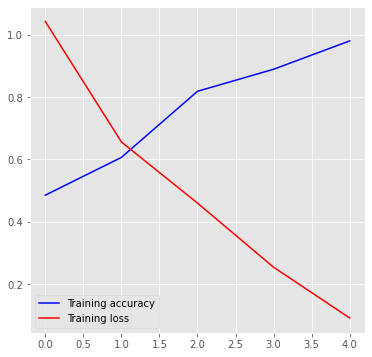

In [8]:
plt.figure(figsize=(6,6))
plt.style.use("ggplot")
plt.plot(stats.history['accuracy'], color='b', label="Training accuracy")
plt.plot(stats.history['loss'], color='r', label="Training loss")
plt.legend()
plt.show()

In [9]:
cnn.save('model.h5')